# Importing Libraries and data

In [4]:
import pandas as pd
from datasets import load_dataset
the_lukbarset=load_dataset('lukebarousse/data_jobs')
data_fram=the_lukbarset['train'].to_pandas()
data_fram['job_posted_date']=pd.to_datetime(data_fram.job_posted_date)
data_fram
data_fram1=data_fram.copy()
import ast
import matplotlib.pyplot as plt
import seaborn as sns
data_fram1['job_skills']=data_fram1['job_skills'].apply(lambda skill:ast.literal_eval(skill) if pd.notna(skill) else skill)
data_fram2=data_fram1.copy()
data_fram2=data_fram2[(data_fram1['job_country']=='India') & (data_fram2['job_title_short']=="Data Analyst") ]
from adjustText import adjust_text


## Cleaning and Grouping the data tp plot the graph

In [5]:
data_fram2=data_fram2.dropna(subset='salary_year_avg')
data_fram2=data_fram2.explode('job_skills')
data_req_1=data_fram2.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
plot_data=data_req_1.head(12)




## plotting the scatter plot to see which skills are optimum for the Indian Job market in Data Analyst

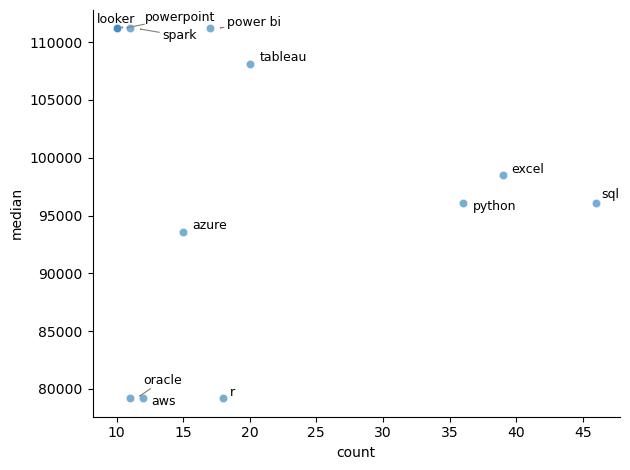

In [36]:
trending_skill=plot_data.index.to_list()
sns.scatterplot(data=plot_data,x='count',y='median',alpha=0.6,sizes=(20,200))
texts=[]
for i,skill in enumerate(trending_skill):
     
     texts.append(plt.text(x=plot_data['count'].loc[skill]+0.5,y=plot_data['median'].loc[skill]+0.5,s=trending_skill[i],fontsize=9))

adjust_text(
    texts,
    arrowprops=dict(
        arrowstyle='->',
        lw=0.8,
        color='gray'
    ))

sns.despine()
plt.tight_layout()

